In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
def extract_rating_from_filename(filename):
    base_name = os.path.splitext(filename)[0]
    _, rating_str = base_name.split('_')
    return int(rating_str)

path = ['aclImdb/train/neg', 'aclImdb/train/pos']

data = []
for directory_path in path:
    for filename in os.listdir(directory_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(directory_path, filename)
            if not os.path.isfile(file_path):
                print(f"File '{file_path}' does not exist.")
                continue
            rating = extract_rating_from_filename(filename)
            
            try:
                with open(file_path, 'r', encoding='utf-8') as file:
                    review_text = file.read().strip()
            except UnicodeDecodeError:
                try:
                    with open(file_path, 'r', encoding='latin-1') as file:
                        review_text = file.read().strip()
                except UnicodeDecodeError:
                    with open(file_path, 'r', encoding='cp1252') as file:
                        review_text = file.read().strip()

            label = 'positive' if rating >=7  else 'negative'
 
            data.append({'review': review_text, 'label': label, 'rating': rating})

df_train = pd.DataFrame(data, columns=['review', 'label', 'rating'])

In [3]:
print(df_train)

                                                  review     label  rating
0      Story of a man who has unnatural feelings for ...  negative       3
1      Airport '77 starts as a brand new luxury 747 p...  negative       4
2      This film lacked something I couldn't put my f...  negative       4
3      Sorry everyone,,, I know this is supposed to b...  negative       1
4      When I was little my parents took me along to ...  negative       1
...                                                  ...       ...     ...
24995  Seeing as the vote average was pretty low, and...  positive       9
24996  The plot had some wretched, unbelievable twist...  positive       8
24997  I am amazed at how this movie(and most others ...  positive      10
24998  A Christmas Together actually came before my t...  positive       8
24999  Working-class romantic drama from director Mar...  positive       7

[25000 rows x 3 columns]


In [4]:
df_train.describe()

,rating
count,25000.000000
mean,5.477720
std,3.466477
min,1.000000
25%,2.000000
50%,5.500000
75%,9.000000
max,10.000000


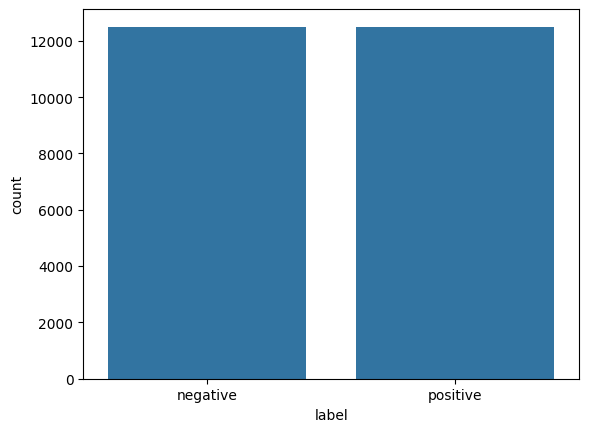

In [5]:
sns.countplot(df_train, x='label')
plt.show()

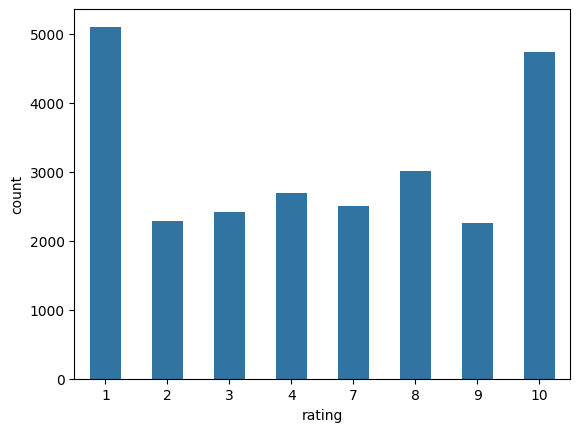

In [6]:
sns.countplot(df_train, x='rating', width=0.5)
plt.show()

In [7]:
def number_of_words(review):
    return len(review.split())

df_train['words_count'] = df_train['review'].apply(number_of_words)
print(df_train)

                                                  review     label  rating  \
0      Story of a man who has unnatural feelings for ...  negative       3   
1      Airport '77 starts as a brand new luxury 747 p...  negative       4   
2      This film lacked something I couldn't put my f...  negative       4   
3      Sorry everyone,,, I know this is supposed to b...  negative       1   
4      When I was little my parents took me along to ...  negative       1   
...                                                  ...       ...     ...   
24995  Seeing as the vote average was pretty low, and...  positive       9   
24996  The plot had some wretched, unbelievable twist...  positive       8   
24997  I am amazed at how this movie(and most others ...  positive      10   
24998  A Christmas Together actually came before my t...  positive       8   
24999  Working-class romantic drama from director Mar...  positive       7   

       words_count  
0              112  
1              801  


label
negative    230.86784
positive    236.70656
Name: words_count, dtype: float64


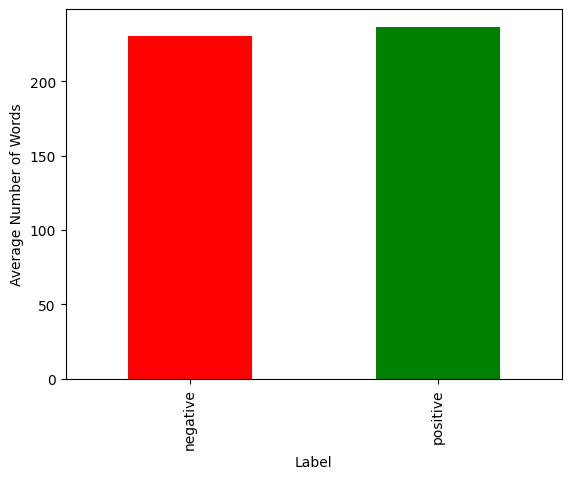

In [8]:
word_count_comparison = df_train.groupby('label')['words_count'].mean()
word_count_comparison.plot(kind='bar', color=['red', 'green'])
print(word_count_comparison)
plt.xlabel('Label')
plt.ylabel('Average Number of Words')
plt.show()

In [9]:
path = ['aclImdb/test/neg', 'aclImdb/test/pos']

data = []
for directory_path in path:
    for filename in os.listdir(directory_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(directory_path, filename)
            if not os.path.isfile(file_path):
                print(f"File '{file_path}' does not exist.")
                continue
            rating = extract_rating_from_filename(filename)
            
            try:
                with open(file_path, 'r', encoding='utf-8') as file:
                    review_text = file.read().strip()
            except UnicodeDecodeError:
                try:
                    with open(file_path, 'r', encoding='latin-1') as file:
                        review_text = file.read().strip()
                except UnicodeDecodeError:
                    with open(file_path, 'r', encoding='cp1252') as file:
                        review_text = file.read().strip()

            label = 'positive' if rating >=7  else 'negative'
 
            data.append({'review': review_text, 'label': label, 'rating': rating})

df_test = pd.DataFrame(data, columns=['review', 'label', 'rating'])

In [10]:
df_test.head()

,review,label,rating
0,Once again Mr. Costner has dragged out a movie...,negative,2
1,This is an example of why the majority of acti...,negative,4
2,"First of all I hate those moronic rappers, who...",negative,1
3,Not even the Beatles could write songs everyon...,negative,3
4,Brass pictures (movies is not a fitting word f...,negative,3


In [11]:
df_test['words_count'] = df_test['review'].apply(number_of_words)
print(df_test)

                                                  review     label  rating  \
0      Once again Mr. Costner has dragged out a movie...  negative       2   
1      This is an example of why the majority of acti...  negative       4   
2      First of all I hate those moronic rappers, who...  negative       1   
3      Not even the Beatles could write songs everyon...  negative       3   
4      Brass pictures (movies is not a fitting word f...  negative       3   
...                                                  ...       ...     ...   
24995  I was extraordinarily impressed by this film. ...  positive       8   
24996  Although I'm not a golf fan, I attended a snea...  positive      10   
24997  From the start of "The Edge Of Love", the view...  positive       8   
24998  This movie, with all its complexity and subtle...  positive      10   
24999  I've seen this story before but my kids haven'...  positive       7   

       words_count  
0              168  
1              234  


label
negative    228.06128
positive    228.99208
Name: words_count, dtype: float64


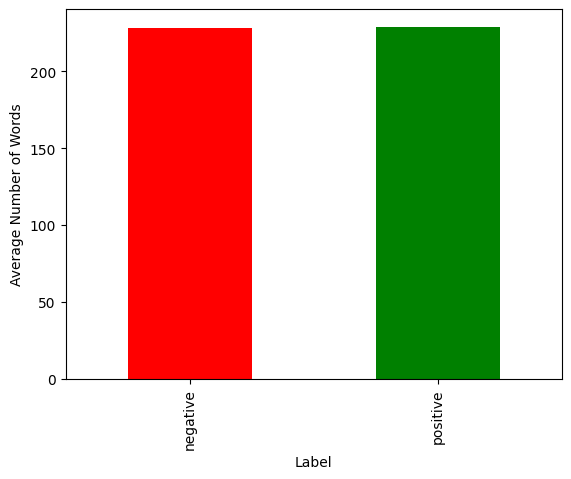

In [12]:
word_count_comparison = df_test.groupby('label')['words_count'].mean()
word_count_comparison.plot(kind='bar', color=['red', 'green'])
print(word_count_comparison)
plt.xlabel('Label')
plt.ylabel('Average Number of Words')
plt.show()

In [13]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vgrya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vgrya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [14]:
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [15]:
df_train['review'] = df_train['review'].apply(data_processing)
df_test['review'] = df_test['review'].apply(data_processing)

In [16]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [17]:
df_train['review'] = df_train['review'].apply(lambda x: stemming(x))
df_test['review'] = df_test['review'].apply(lambda x: stemming(x))

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [43]:
df_train['review'].drop_duplicates()
df_test['review'].drop_duplicates()


0        mr costner dragged movie far longer necessary ...
1        example majority action films generic boring t...
2        first hate moronic rappers couldnt act gun pre...
3        even beatles could write songs everyone liked ...
4        brass pictures movies fitting word really some...
                               ...                        
24995    extraordinarily impressed film one best sports...
24996    although im golf fan attended sneak preview mo...
24997    start edge love viewer transported striking wo...
24998    movie complexity subtlety makes one thoughtpro...
24999    ive seen story kids havent boy troubled past j...
Name: review, Length: 24799, dtype: object

In [44]:
x_train = df_train['review']
y_train = df_train['rating']
x_test = df_test['review']
y_test = df_test['rating']

In [45]:
vect = TfidfVectorizer()
x_train = vect.fit_transform(df_train['review'])
x_test = vect.fit_transform(df_test['review'])

In [46]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

ValueError: X has 138871 features, but LogisticRegression is expecting 141985 features as input.